In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import random
import pickle
import numpy as np

In [53]:
base_path = os.path.abspath(".")
config_output_filename = os.path.join(base_path, 'config.pickle')
record_path = os.path.join(base_path, 'record_path64.csv')

In [54]:
df_pickle = pd.read_pickle(config_output_filename)

In [57]:
objects = []
with (open(config_output_filename, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [58]:
objects[0].use_horizontal_flips

False

In [59]:
with open(config_output_filename, 'rb') as f_in:
	C = pickle.load(f_in)

# turn off any data augmentation at test time
C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

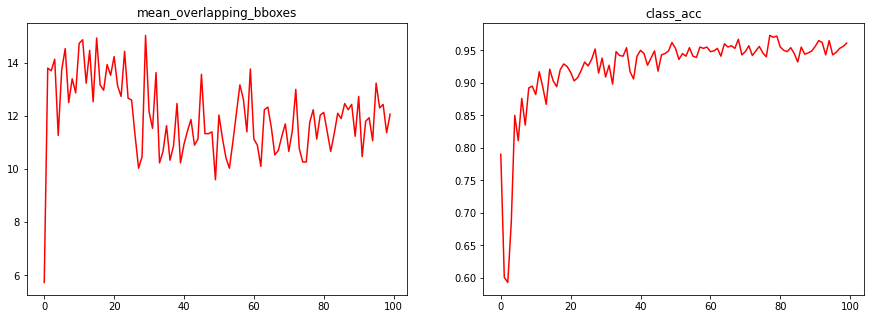

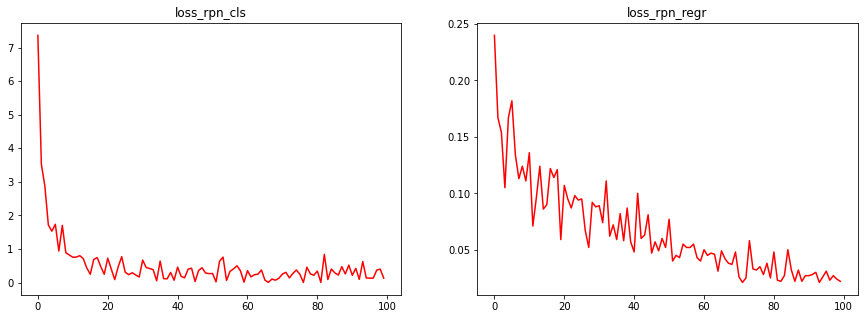

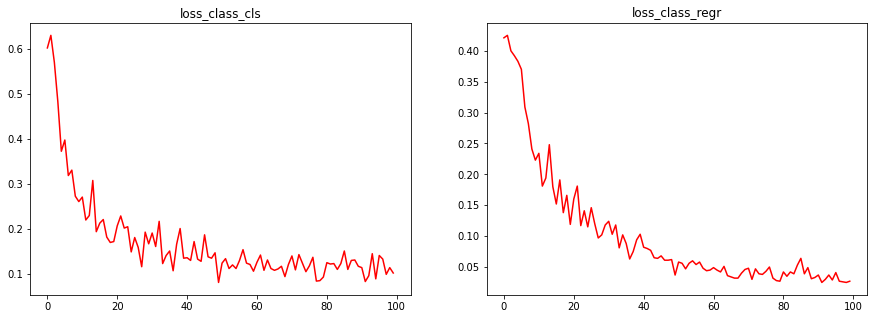

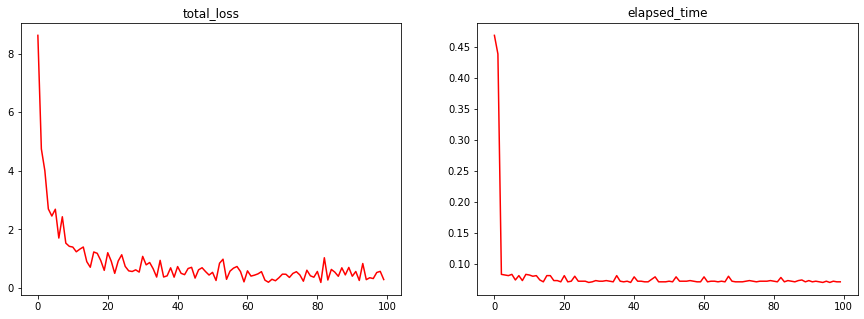

In [60]:
# Load the records
record_df = pd.read_csv(record_path)

r_epochs = len(record_df)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['mean_overlapping_bboxes'], 'r')
plt.title('mean_overlapping_bboxes')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['class_acc'], 'r')
plt.title('class_acc')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_cls'], 'r')
plt.title('loss_rpn_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_regr'], 'r')
plt.title('loss_rpn_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_cls'], 'r')
plt.title('loss_class_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_regr'], 'r')
plt.title('loss_class_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['curr_loss'], 'r')
plt.title('total_loss')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['elapsed_time'], 'r')
plt.title('elapsed_time')

plt.show()

In [61]:
ROOT_DIR = os.path.abspath(".")
img_folder = r"/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_small/clipped"

In [62]:
test_df = pd.read_csv(os.path.join(ROOT_DIR, "bounding_box_coordinates_ans64.csv"))
test_df['img_path'] = test_df.apply(lambda x: os.path.join(img_folder, x['img_name']), axis=1)

In [63]:
test_df

,img_name,x1,y1,x2,y2,img_path
0,1.tif,12,16,48,48,/home/mirandalv/Documents/github/geo_AnimalDet...
1,10.tif,16,24,48,44,/home/mirandalv/Documents/github/geo_AnimalDet...
2,10.tif,40,0,68,12,/home/mirandalv/Documents/github/geo_AnimalDet...
3,100.tif,12,24,48,40,/home/mirandalv/Documents/github/geo_AnimalDet...
4,101.tif,12,20,48,40,/home/mirandalv/Documents/github/geo_AnimalDet...
...,...,...,...,...,...,...
809,97.tif,12,20,48,40,/home/mirandalv/Documents/github/geo_AnimalDet...
810,97.tif,32,0,56,12,/home/mirandalv/Documents/github/geo_AnimalDet...
811,98.tif,12,20,52,44,/home/mirandalv/Documents/github/geo_AnimalDet...
812,99.tif,12,20,48,44,/home/mirandalv/Documents/github/geo_AnimalDet...


In [64]:
img_count = test_df['img_name'].unique()

In [80]:
def plot_bbox_plt(img_name):
    
    img_url = test_df.loc[test_df["img_name"]==img_name]['img_path'].values[0]
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(img_url)
    plt.imshow(image)

    # iterating over the image for different objects
    for _,row in test_df[test_df.img_name == img_name].iterrows():
        
        """
        xmin = row.miny
        xmax = row.maxy
        ymin = row.maxx
        ymax = row.minx
        """
        
        xmin = row.x1
        xmax = row.x2
        ymin = row.y1
        ymax = row.y2

    
        width = xmax - xmin
        height = ymax - ymin
    
        # assign different color to different classes of objects
        edgecolor = 'r'
        a = 20
        b = 20
        ax.annotate('bird', xy=(xmax-a,ymin+b))
        
        

        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [81]:
img_names = test_df["img_name"].value_counts().tail(50).index.values

In [82]:
img_names = test_df["img_name"].value_counts().index.values

In [83]:
img_names

array(['36.tif', '513.tif', '156.tif', '260.tif', '384.tif', '54.tif',
       '507.tif', '510.tif', '65.tif', '117.tif', '416.tif', '118.tif',
       '382.tif', '218.tif', '515.tif', '336.tif', '37.tif', '124.tif',
       '293.tif', '62.tif', '188.tif', '39.tif', '35.tif', '203.tif',
       '326.tif', '81.tif', '123.tif', '78.tif', '225.tif', '201.tif',
       '268.tif', '269.tif', '226.tif', '421.tif', '325.tif', '197.tif',
       '341.tif', '512.tif', '500.tif', '210.tif', '241.tif', '354.tif',
       '333.tif', '313.tif', '444.tif', '109.tif', '337.tif', '144.tif',
       '53.tif', '381.tif', '120.tif', '525.tif', '162.tif', '250.tif',
       '191.tif', '157.tif', '131.tif', '257.tif', '256.tif', '431.tif',
       '509.tif', '504.tif', '309.tif', '245.tif', '158.tif', '262.tif',
       '423.tif', '460.tif', '237.tif', '83.tif', '306.tif', '508.tif',
       '298.tif', '404.tif', '135.tif', '97.tif', '468.tif', '315.tif',
       '205.tif', '215.tif', '239.tif', '115.tif', '108.tif', '

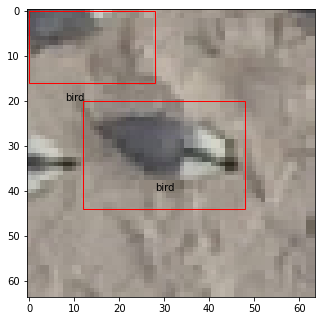

In [84]:
plot_bbox_plt('99.tif')

216.tif
539.tif
489.tif
510.tif
543.tif
461.tif
26.tif
451.tif
545.tif
70.tif
45.tif
289.tif
388.tif
169.tif
535.tif
284.tif
230.tif
132.tif
157.tif
350.tif
121.tif
371.tif
114.tif
105.tif
91.tif


/home/mirandalv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


32.tif
469.tif
397.tif
418.tif
135.tif
164.tif
260.tif
385.tif
477.tif
134.tif
184.tif
143.tif
68.tif
25.tif
228.tif
221.tif
529.tif
151.tif
174.tif
72.tif
344.tif
423.tif
484.tif
346.tif
144.tif


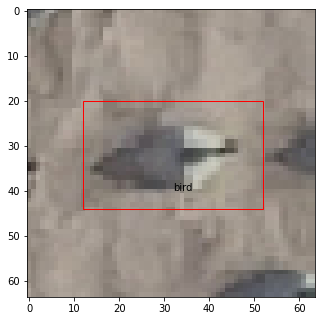

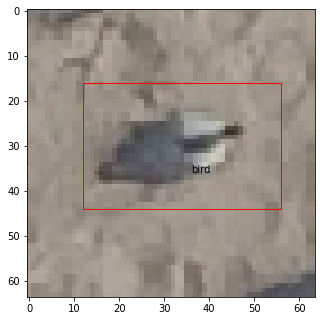

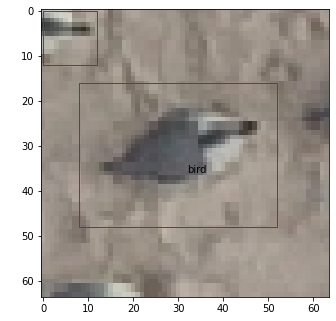

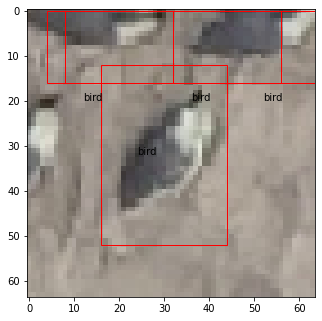

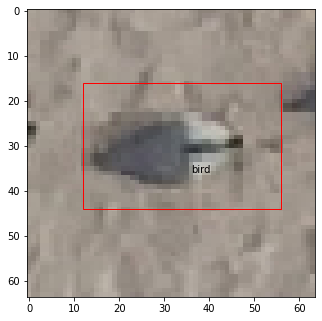

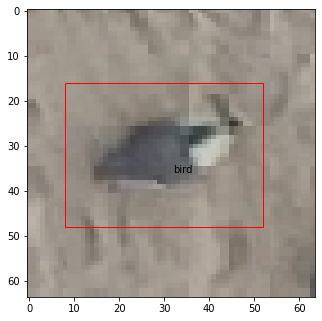

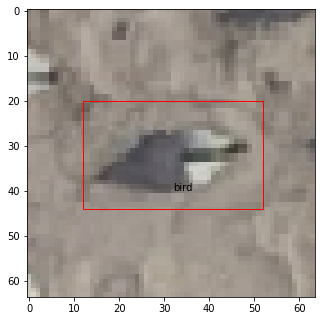

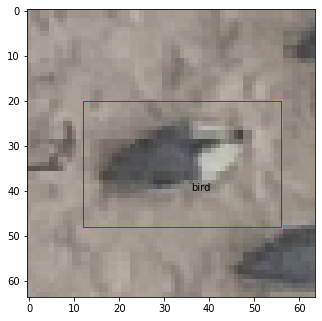

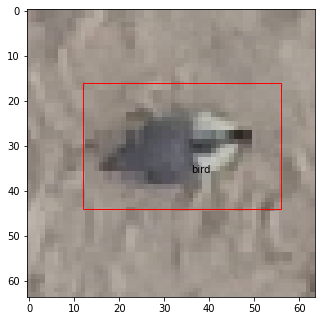

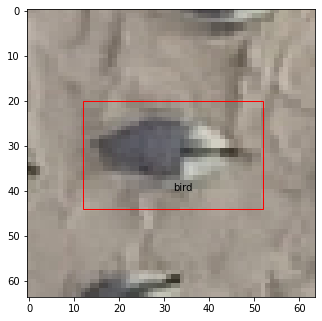

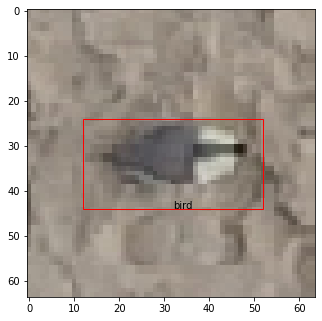

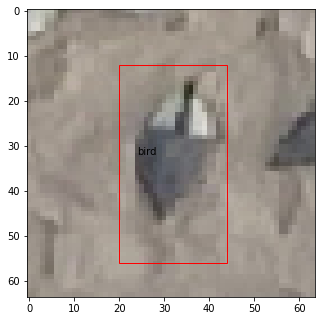

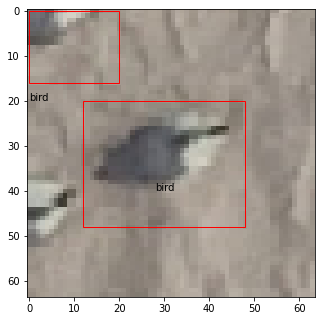

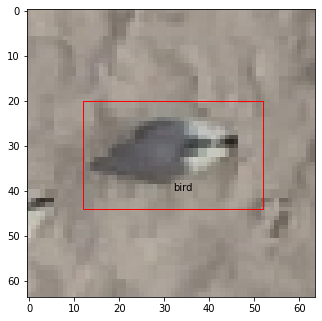

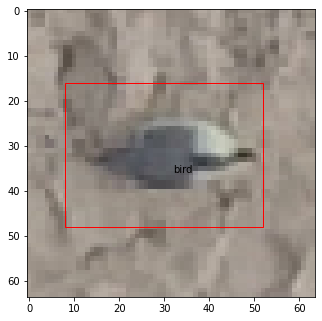

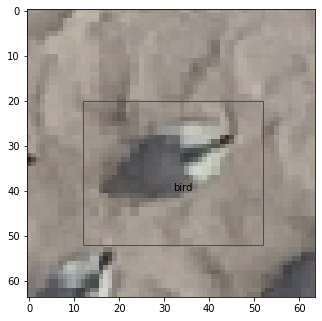

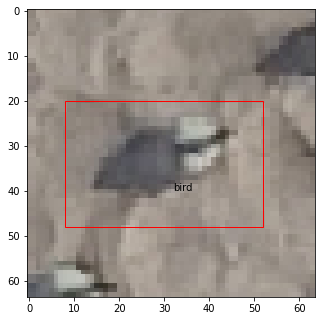

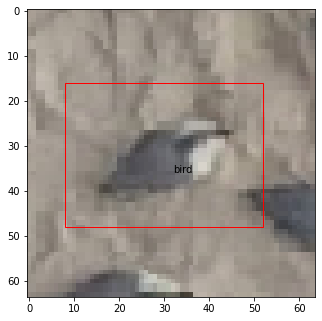

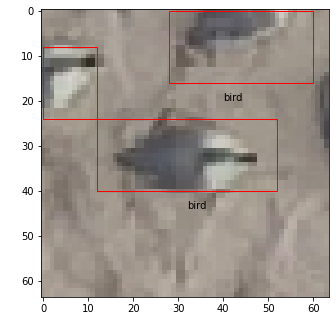

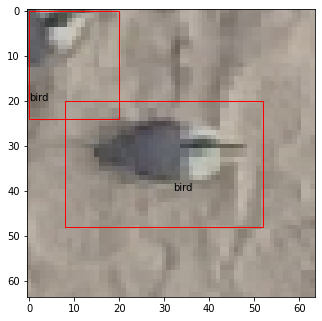

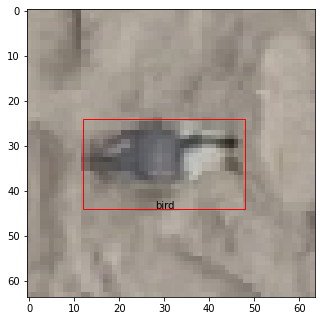

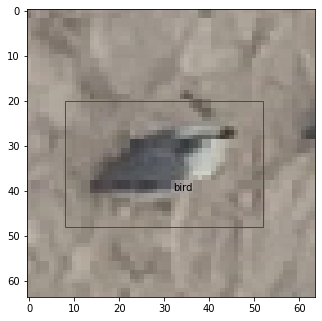

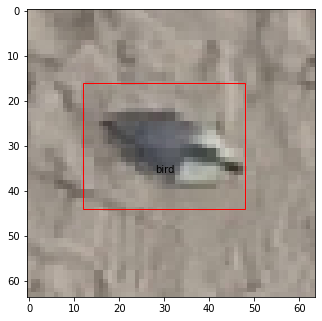

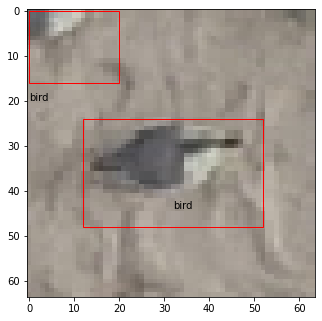

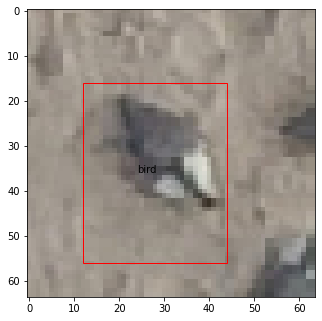

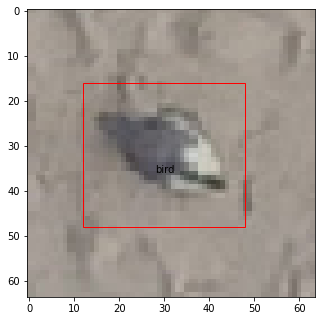

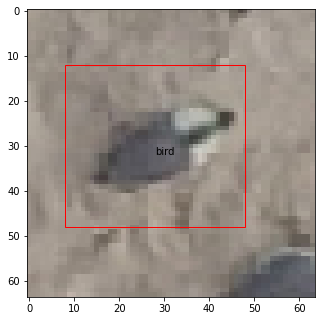

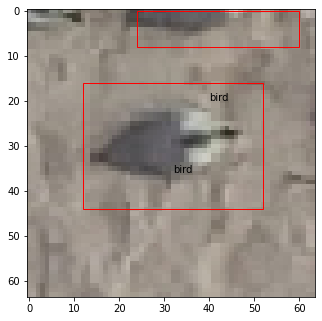

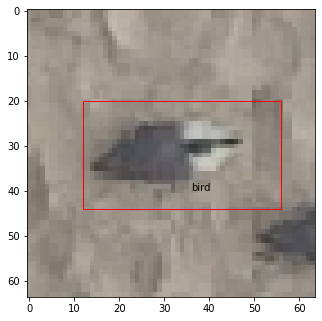

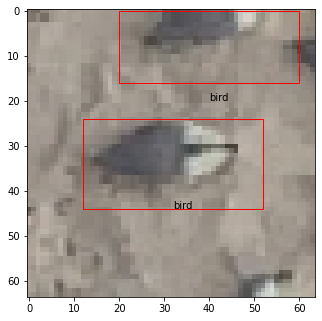

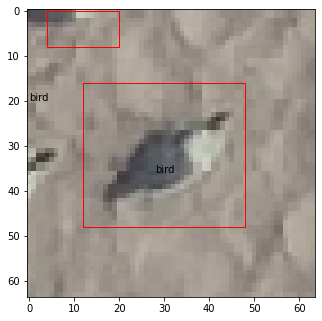

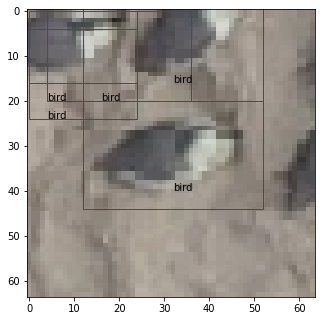

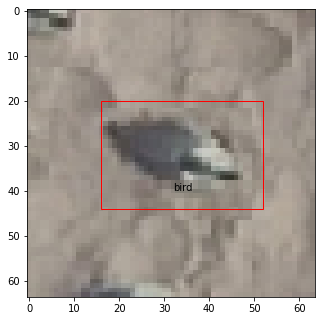

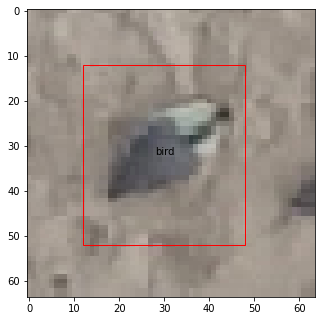

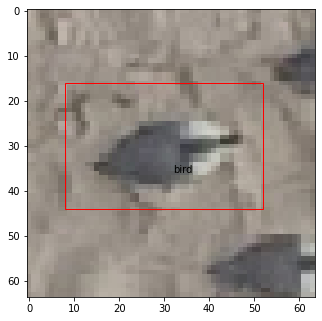

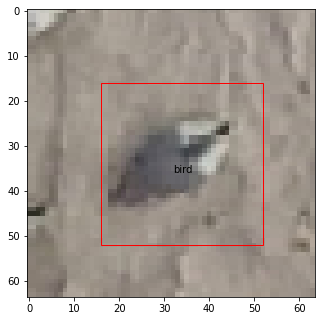

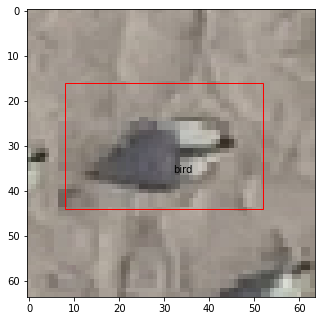

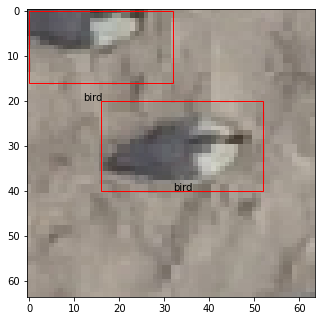

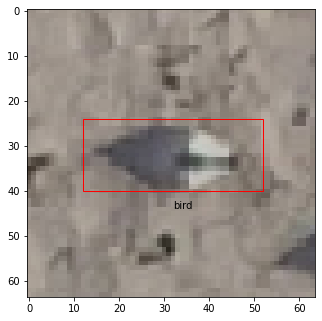

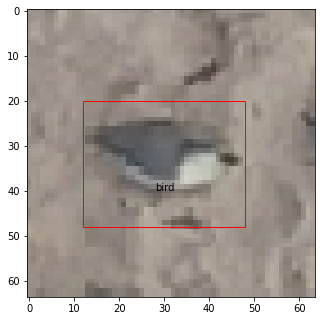

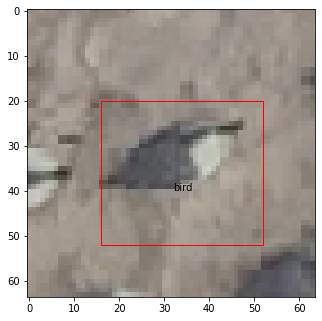

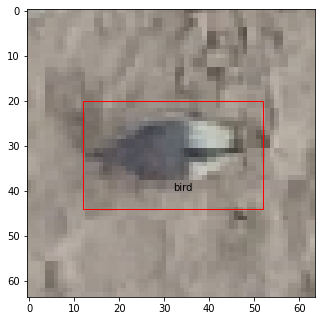

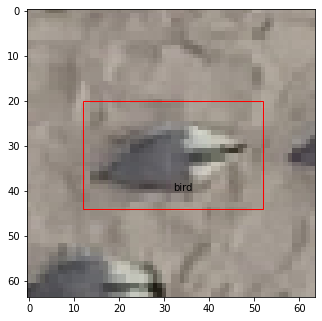

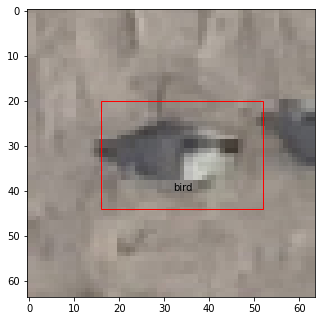

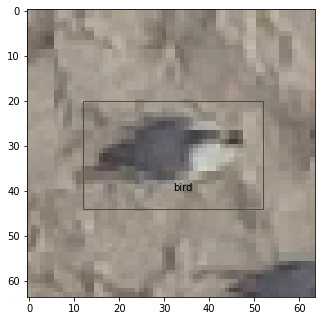

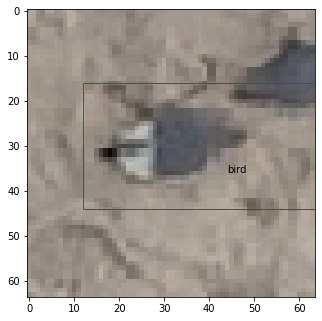

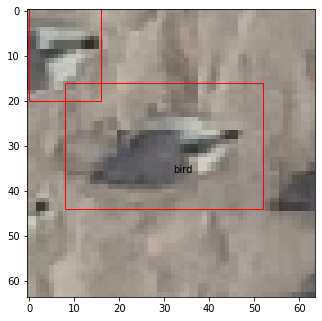

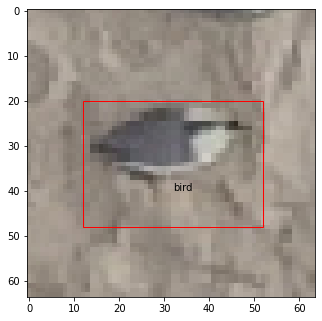

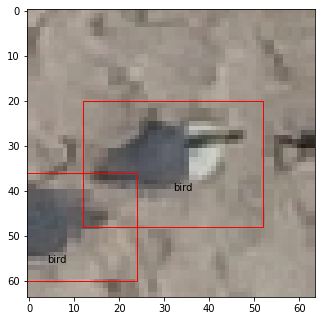

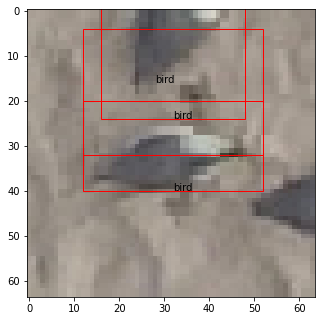

In [90]:
for img_name in random.sample(list(img_names), 50):
    #plot_bbox(img_id)
    print(img_name)
    plot_bbox_plt(img_name)